In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sklearn.preprocessing
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/MyDrive/Epileptic Seizure Recognition.csv')

In [6]:
#data=pd.read_csv('/Users/Sharmishta/Downloads/Epileptic Seizure Recognition.csv/Epileptic Seizure Recognition.csv')

In [7]:
#data=pd.read_csv('C:/Users/GPU_CA/Downloads/Sharmishta/Epileptic Seizure Recognition.csv')

In [8]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [9]:
data.shape

(11500, 180)

In [10]:
cols = data.columns
y = data.y
y[y>1]=0

non_seizure, seizure = y.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


<ipython-input-10-9e7d252921cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>1]=0


In [11]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [12]:
print(data['y'].value_counts())

y
0    9200
1    2300
Name: count, dtype: int64


In [13]:
data.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [14]:
data = data.drop('Unnamed', axis = 1)
#data1=data.drop(['y'],axis=1)
#data1.head()

In [15]:
import imblearn
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')

df1, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

df1.shape, y.shape

((18400, 178), (18400,))

In [16]:
df1['y']=y
print(df1['y'].value_counts())

y
0    9200
1    9200
Name: count, dtype: int64


<ipython-input-16-6ba87d2f3b4f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1['y']=y


In [17]:
df1=df1.drop('y', axis=1)
df1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,-70,-27,22,86,168,275,331,313,208,60,...,281,389,371,294,216,173,163,160,162,160
18396,-164,-177,-162,-134,-91,-68,-28,4,37,77,...,-118,-152,-190,-211,-202,-187,-156,-114,-85,-72
18397,17,6,12,43,83,102,93,60,10,-36,...,175,183,161,126,66,10,-39,-77,-108,-126
18398,-755,-512,-158,138,307,294,260,227,199,148,...,-43,-32,-16,26,142,446,901,1233,1248,811


In [18]:
scaler = sklearn.preprocessing.StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df1))
df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.619279,0.827555,0.989547,0.965974,0.823408,0.532080,0.236326,-0.026876,-0.126100,-0.152841,...,0.067920,-0.028703,-0.010897,-0.062890,-0.239293,-0.348986,-0.454170,-0.414548,-0.278852,-0.145271
1,1.642303,1.601063,1.508344,1.413102,1.352872,1.315362,1.276578,1.127646,1.006614,0.960521,...,0.710306,0.701469,0.645477,0.629537,0.660763,0.684594,0.690931,0.686785,0.641588,0.575254
2,-0.061378,-0.095015,-0.137918,-0.110446,-0.103155,-0.131648,-0.226008,-0.289828,-0.338739,-0.383761,...,0.152233,0.269820,0.303367,0.246159,0.138023,0.012767,-0.061680,-0.084148,-0.083360,-0.085228
3,-0.358911,-0.344793,-0.338084,-0.338150,-0.338932,-0.374878,-0.411767,-0.400761,-0.346917,-0.321907,...,-0.285392,-0.290920,-0.273446,-0.254579,-0.239293,-0.277430,-0.251856,-0.235072,-0.221834,-0.201312
4,0.032365,-0.199761,-0.346254,-0.379551,-0.293432,-0.181118,-0.056760,0.010101,-0.077029,-0.239436,...,0.075950,0.056013,0.056730,0.011438,-0.062426,-0.102517,-0.203300,-0.279941,-0.303289,-0.233336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,-0.216258,-0.046671,0.143948,0.398783,0.724133,1.150460,1.375649,1.296099,0.859402,0.251268,...,1.163991,1.609142,1.524619,1.208516,0.912307,0.748199,0.719255,0.711259,0.718970,0.699345
18396,-0.599382,-0.650974,-0.607695,-0.512033,-0.347205,-0.263569,-0.106296,0.026536,0.160146,0.321369,...,-0.437959,-0.573307,-0.707050,-0.767053,-0.730590,-0.682912,-0.571513,-0.406390,-0.286998,-0.229333
18397,0.138336,0.086276,0.103098,0.220760,0.372536,0.437262,0.393190,0.256619,0.049737,-0.144594,...,0.738410,0.778117,0.689235,0.551297,0.322750,0.100224,-0.098096,-0.255467,-0.380671,-0.445491
18398,-3.008175,-2.000584,-0.591355,0.614067,1.299099,1.228789,1.082562,0.942758,0.822599,0.614142,...,-0.136840,-0.089215,-0.014875,0.160095,0.621459,1.833457,3.705420,5.088039,5.141971,3.305246


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.7, random_state=42)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test1))
print("Validation set size:", len(X_val))

Training set size: 12880
Testing set size: 3864
Validation set size: 1656


In [20]:
print(X_train.shape)
print(X_test1.shape)
print(y_train.shape)

(12880, 178)
(3864, 178)
(12880,)


In [21]:
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test1 = X_test1.values.reshape((X_test1.shape[0], 1, X_test1.shape[1]))
X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

In [22]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])

12880
1
178


In [23]:
print(X_train.shape)
print(X_test1.shape)
print(X_val.shape)

(12880, 1, 178)
(3864, 1, 178)
(1656, 1, 178)


In [24]:
import keras.utils
y_train = keras.utils.to_categorical(y_train)
y_test1= keras.utils.to_categorical(y_test1)
y_val= keras.utils.to_categorical(y_val)

In [25]:
print(y_train.shape)
print(y_test1.shape)
print(y_val.shape)

(12880, 2)
(3864, 2)
(1656, 2)


In [26]:
#y_train = y_train.reshape((y_train.shape[0], 3))
y_train = np.reshape(y_train, (-1, 2))
y_val = np.reshape(y_val, (-1, 2))
y_test1 = np.reshape(y_test1, (-1, 2))

In [27]:
print(y_train.shape[0])
print(y_train.shape[1])


12880
2


In [28]:
#from keras.layers.rnn import LSTMV1
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.layers import Dense
from keras.models import Sequential, Model
#from keras.utils import plot_model
from keras.layers import Input, Dense, Dropout
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import regularizers

In [29]:
# Attention Layer
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q",
                                   shape=(input_shape[-1], input_shape[-1]),
                                   initializer="uniform",
                                   trainable=True)
        self.W_k = self.add_weight(name="W_k",
                                   shape=(input_shape[-1], input_shape[-1]),
                                   initializer="uniform",
                                   trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        v = x

        attention_score = tf.matmul(q, k, transpose_b=True)
        attention_score = tf.nn.softmax(attention_score, axis=-1)
        output = tf.matmul(attention_score, v)

        return output

# Model with Attention Layer
def GRU_LSTM():
    # input layer of model for brain signals
    inputs = tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2]))

    gru1_1 = GRU(320, return_sequences=True)(inputs)
    gru1_2 = GRU(128, return_sequences=True)(gru1_1)
    gru1_3 = GRU(64, return_sequences=True)(gru1_2)

    lstm1_1 = LSTM(320, return_sequences=True)(inputs)
    lstm1_2 = LSTM(128, return_sequences=True)(lstm1_1)
    lstm1_3 = LSTM(64, return_sequences=True)(lstm1_2)

    concat = Concatenate()([gru1_3, lstm1_3])

    attention_output = AttentionLayer()(concat)

    flatten = Flatten()(attention_output)

    outputs = Dense(2, activation='softmax')(flatten)

    model = Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [30]:
#creating model
model1 = GRU_LSTM()
#Compiling model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy', dtype=None, threshold=0.5),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1, 178)]             0         []                            
                                                                                                  
 gru (GRU)                   (None, 1, 320)               480000    ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 (None, 1, 320)               638720    ['input_1[0][0]']             
                                                                                                  
 gru_1 (GRU)                 (None, 1, 128)               172800    ['gru[0][0]']                 
                                                                                              

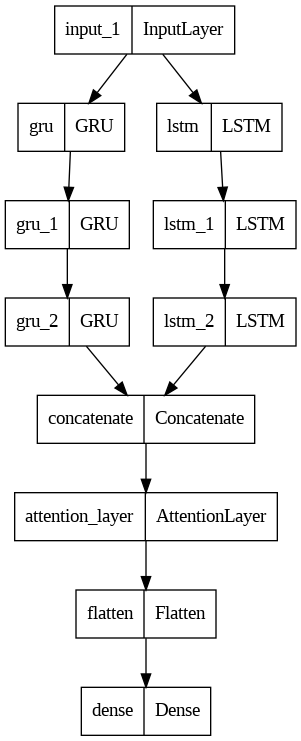

In [31]:
import keras
from keras.utils import plot_model
plot_model(model1)

In [32]:
history = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
403/403 [==============================] - 30s 43ms/step - loss: 0.1627 - accuracy: 0.9399 - Recall: 0.9399 - Precision: 0.9399 - AUC: 0.9817 - val_loss: 0.0603 - val_accuracy: 0.9752 - val_Recall: 0.9752 - val_Precision: 0.9752 - val_AUC: 0.9927
Epoch 2/20
403/403 [==============================] - 13s 33ms/step - loss: 0.0668 - accuracy: 0.9764 - Recall: 0.9764 - Precision: 0.9764 - AUC: 0.9938 - val_loss: 0.0487 - val_accuracy: 0.9819 - val_Recall: 0.9819 - val_Precision: 0.9819 - val_AUC: 0.9951
Epoch 3/20
403/403 [==============================] - 13s 33ms/step - loss: 0.0450 - accuracy: 0.9837 - Recall: 0.9837 - Precision: 0.9837 - AUC: 0.9961 - val_loss: 0.0500 - val_accuracy: 0.9849 - val_Recall: 0.9849 - val_Precision: 0.9849 - val_AUC: 0.9936
Epoch 4/20
403/403 [==============================] - 16s 41ms/step - loss: 0.0328 - accuracy: 0.9888 - Recall: 0.9888 - Precision: 0.9888 - AUC: 0.9973 - val_loss: 0.0447 - val_accuracy: 0.9843 - val_Recall: 0.9843 - val_Prec

In [33]:
pred=model1.predict(X_test1)

121/121 [==============================] - 3s 7ms/step


Text(0, 0.5, 'Accuracy')

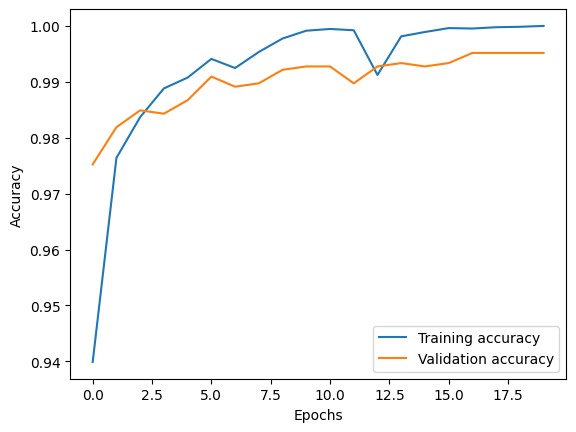

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

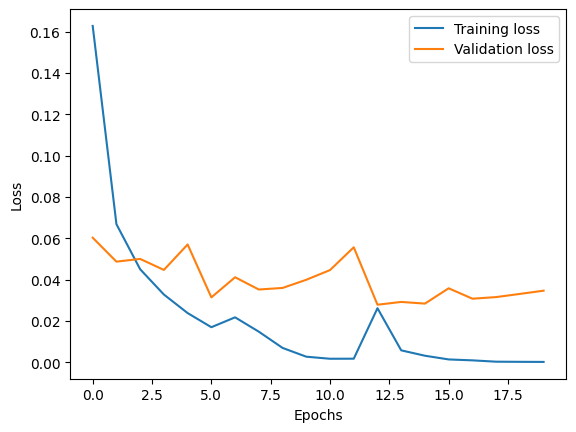

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [36]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))

Accuracy: 0.993789


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test1.argmax(axis=1), pred.argmax(axis=1 ))
print(cm)

[[1924   22]
 [   2 1916]]


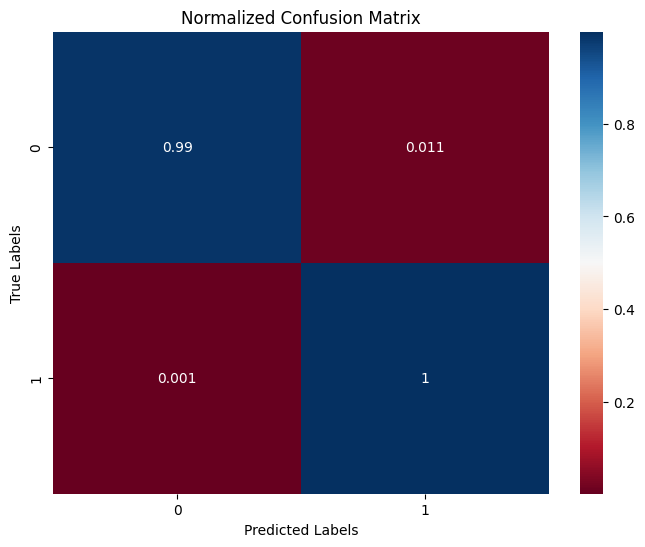

In [39]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the normalized confusion matrix
plt.figure(figsize=(8, 6))
sn.heatmap(cm_normalized, annot=True, cmap='RdBu')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [40]:
print(classification_report(y_test1.argmax(axis=1), pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1946
           1       0.99      1.00      0.99      1918

    accuracy                           0.99      3864
   macro avg       0.99      0.99      0.99      3864
weighted avg       0.99      0.99      0.99      3864

